In [4]:
import pandas # charger la librairie pandas Big data
import csv
import numpy as np
from math import*


In [5]:
print(pandas.__version__)

0.23.4


In [24]:
# importer le fichier source arbres

df = pandas.read_csv('https://opendata.paris.fr/explore/dataset/les-arbres/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true'
   ,usecols = ['IDBASE','ARRONDISSEMENT','DOMANIALITE','LIBELLEFRANCAIS','HAUTEUR (m)','geo_point_2d'],
   dtype = {'IDBASE': int,'HAUTEUR (m)': int}, sep=';')
                     
df.rename(columns={'HAUTEUR (m)': 'HAUTEUR_m'}, inplace=True)             # change le nom de l'entete
print('**** sauve le nouveau fichier en csv ****')

df.to_csv(r'C:\data\BIG DATA\les-arbresParis.csv',
    index = None, header=True, encoding = 'iso-8859-1',
    sep=';') # sauve le nouveau fichier en csv
print('telechargement et sauvegarde effectuée')


**** sauve le nouveau fichier en csv ****
telechargement et sauvegarde effectuée


In [25]:
print(df)


         IDBASE   DOMANIALITE     ARRONDISSEMENT       LIBELLEFRANCAIS  \
0       2017237         DASCO    PARIS 17E ARRDT      Poirier à fleurs   
1       2028933  PERIPHERIQUE    PARIS 18E ARRDT          Non spécifié   
2        209445    Alignement    PARIS 19E ARRDT            Marronnier   
3        210492    Alignement    PARIS 13E ARRDT           Amélanchier   
4        211949    Alignement    PARIS 18E ARRDT           Micocoulier   
5        219498    Alignement     PARIS 8E ARRDT               Platane   
6        225369    Alignement    PARIS 10E ARRDT               Platane   
7        228192    Alignement    PARIS 17E ARRDT     Cerisier à fleurs   
8        228241    Alignement    PARIS 20E ARRDT      Poirier à fleurs   
9        233990    Alignement    PARIS 15E ARRDT               Tilleul   
10       235068    Alignement    PARIS 19E ARRDT               Tilleul   
11       247758    Alignement    PARIS 14E ARRDT               Platane   
12       248501    Alignement    PARIS

In [26]:
print(df.shape)

(203717, 6)


In [27]:
# Def pour traîter de les colonnes
def check_colonne(colonne):
    for i in colonne:
        if  i == ' ':
            print(' - "{}" n\'est pas une',colonne,' valide, nous le supprimons.' \
                .format(colonne))
            return np.NaN  # np.NaN valeur utilisée par les librairies  Numpy  et  Pandas  pour spécifier qu'une valeur est inconnue. C'est en quelque sorte un équivalent de  None.
        return colonne

In [28]:
print(check_colonne(df.ARRONDISSEMENT))
print(check_colonne(df.LIBELLEFRANCAIS))
print(check_colonne(df.HAUTEUR_m))
print(check_colonne(df.DOMANIALITE))
print(check_colonne(df.geo_point_2d))


0           PARIS 17E ARRDT
1           PARIS 18E ARRDT
2           PARIS 19E ARRDT
3           PARIS 13E ARRDT
4           PARIS 18E ARRDT
5            PARIS 8E ARRDT
6           PARIS 10E ARRDT
7           PARIS 17E ARRDT
8           PARIS 20E ARRDT
9           PARIS 15E ARRDT
10          PARIS 19E ARRDT
11          PARIS 14E ARRDT
12          PARIS 16E ARRDT
13          PARIS 13E ARRDT
14          PARIS 14E ARRDT
15          PARIS 19E ARRDT
16          PARIS 20E ARRDT
17          PARIS 14E ARRDT
18          PARIS 18E ARRDT
19          PARIS 18E ARRDT
20          PARIS 20E ARRDT
21          PARIS 19E ARRDT
22          PARIS 15E ARRDT
23           PARIS 5E ARRDT
24          PARIS 17E ARRDT
25          PARIS 13E ARRDT
26          PARIS 19E ARRDT
27          PARIS 14E ARRDT
28             VAL-DE-MARNE
29             VAL-DE-MARNE
                ...        
203687       PARIS 8E ARRDT
203688      PARIS 17E ARRDT
203689      PARIS 18E ARRDT
203690      PARIS 20E ARRDT
203691       PARIS 8

In [29]:
print(check_colonne(df.ARRONDISSEMENT).shape)

(203717,)


In [30]:
print(check_colonne(df.DOMANIALITE).shape)

(203717,)


In [31]:
print(check_colonne(df.LIBELLEFRANCAIS).shape)

(203717,)


In [32]:
print(check_colonne(df.HAUTEUR_m).shape)

(203717,)


In [33]:
print(check_colonne(df.geo_point_2d).shape)

(203717,)


In [34]:
# après vérification des valeurs manquantes avec la def check_colonne() aucune ligne n'a été suprimée-->

In [35]:
# Vérifiacation de la cohérence des valeurs numériques la colonne Hauteur

In [36]:
print("statistiques sur la colonne hauteur",df['HAUTEUR_m'].describe())

statistiques sur la colonne hauteur count    203717.000000
mean         13.171331
std        1953.800921
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: HAUTEUR_m, dtype: float64


In [37]:
# valeur minimale = 0 maximale = 881 818m
# l'ecart-type = 1 954 explique une grande dispertion de ensemble de valeurs par rapport à la moyenne qui = 13,17m

In [38]:
# trier les hauteurs d'arbres par ordre croissant
print("la colonne hauteur par ordre croissant",df['HAUTEUR_m'].sort_values())

la colonne hauteur par ordre croissant 134070         0
83147          0
83148          0
83150          0
83152          0
83154          0
138913         0
138912         0
138911         0
138903         0
83156          0
29924          0
83157          0
83158          0
29927          0
29928          0
83146          0
83145          0
83143          0
83142          0
83109          0
83112          0
83113          0
83114          0
139022         0
55554          0
29895          0
29929          0
29896          0
55551          0
           ...  
23417        225
12672        255
91605        260
73071        510
177341       510
141716       512
155858       576
134659       608
52472        610
132491       610
151917       615
83528        618
49021        714
97147        720
166926       810
85631        810
26569        810
81688        810
174653       818
1770        1010
109798      1211
145674      1216
127805      1510
48152       1511
101438      1514
132857   

In [39]:
# nbre de ligne dans la data frame arbresParis
print(df.shape[0])

203717


In [40]:
# nbre de ligne d'arbres de hauteur = 0
print(df[df["HAUTEUR_m"] == 0].shape[0])

33898


In [41]:
# nombre d'arbres à hauteur supérieure à 40m

In [42]:
print(df[df["HAUTEUR_m"] > 40].shape[0])

468


In [43]:
# nombre d'arbres a hauteurs inférieure à 40m

In [44]:
print(df[df["HAUTEUR_m"] <= 40].shape[0])

203249


In [45]:
# des valeurs pour HAUTEUR_m == 0
mask = df[df["HAUTEUR_m"] == 0]


In [46]:
nbreDf = df.shape[0]
nbreDe0DansDf = mask.shape[0]
PourcentageDe0 = ((nbreDe0DansDf) / (nbreDf))*100
print(nbreDe0DansDf)
print(nbreDf)
print("le pourcentage d'arbres de hauteur = 0m :")
print(round(PourcentageDe0,2)) # " % dans notre dataframe pour une hauteur = 0 ")

33898
203717
le pourcentage d'arbres de hauteur = 0m :
16.64


In [47]:
# des valeurs pour HAUTEUR_m > 40
mask1 = df[df["HAUTEUR_m"] > 40]
nbreDe40DansDf = mask1.shape[0]
PourcentageDe40 = ((nbreDe40DansDf) / (nbreDf))*100
print(nbreDe40DansDf)
print(nbreDf)
print("le pourcentage d'arbres avec une hauteur > 40m :")
print(round(PourcentageDe40,2)) # " % des arbres avec une valeur supérieure à 40 en Hauteur


468
203717
le pourcentage d'arbres avec une hauteur > 40m :
0.23


In [48]:
# conclusion si on retire les valeurs ==0 et >40 de la colonne HAUTEUR_m, on perdera 16.78 + 0.23 = 17% des données dans notre Dataframe

In [49]:
df1 = df[(df['HAUTEUR_m'] > 0) & (df['HAUTEUR_m'] <= 40)]
print(df1.shape)

(169351, 6)


In [79]:
# calcul de la moyenne 
Moyenne = (df1.HAUTEUR_m).mean()

print("Dans notre nouvelle base qui contient les arbres de hauteur entre 0 et 40, la hauteur moyenne est de :\n")
print(round(Moyenne,2))



Dans notre nouvelle base qui contient les arbres de hauteur entre 0 et 40, la hauteur moyenne est de :

10.24


In [51]:
# la hauteur moyenne d'arbres est de 10,23m

In [52]:
# calcul de la moyenne par domaine 

In [53]:
dfMoyenne = df1.groupby('DOMANIALITE').mean()
print(round(dfMoyenne.HAUTEUR_m,2))

DOMANIALITE
Alignement      10.49
CIMETIERE       10.83
DAC              9.24
DASCO            7.81
DASES            5.00
DFPE             7.99
DJS              8.84
Jardin          10.15
PERIPHERIQUE     8.54
Name: HAUTEUR_m, dtype: float64


In [54]:
dfMean = dfMoyenne.set_axis(['','MoyenneHauteur'], axis=1, inplace=False)

#dfMoyenne.rename(columns={'DOMANIALITE', 'MoyenneHauteur'})
print(dfMean["MoyenneHauteur"])

DOMANIALITE
Alignement      10.486905
CIMETIERE       10.831650
DAC              9.238095
DASCO            7.810051
DASES            5.000000
DFPE             7.989170
DJS              8.836612
Jardin          10.145311
PERIPHERIQUE     8.537155
Name: MoyenneHauteur, dtype: float64


In [55]:
# la taille moyenne des arbres les plus élevés est cituée ordre dans les Cimetiéres = 10,85m , les Alignements = 10,46m et les jardins = 10,14m.  

In [56]:
dfMin = df1.groupby('DOMANIALITE').min()
print(dfMin["HAUTEUR_m"])

DOMANIALITE
Alignement      1
CIMETIERE       1
DAC             3
DASCO           1
DASES           5
DFPE            1
DJS             1
Jardin          1
PERIPHERIQUE    1
Name: HAUTEUR_m, dtype: int32


In [57]:
# les arbres les plud petits est située partout  = 1m, sauf dans les DASES 5m et les DACs 3m.

In [58]:
dfMax = df1.groupby('DOMANIALITE').max()
print(dfMax["HAUTEUR_m"])

DOMANIALITE
Alignement      40
CIMETIERE       35
DAC             16
DASCO           34
DASES            5
DFPE            25
DJS             40
Jardin          40
PERIPHERIQUE    28
Name: HAUTEUR_m, dtype: int32


In [59]:
del dfMax["IDBASE"]
print(dfMax)

               ARRONDISSEMENT  HAUTEUR_m                  geo_point_2d
DOMANIALITE                                                           
Alignement     PARIS 9E ARRDT         40  48.9020341835, 2.37974704762
CIMETIERE        VAL-DE-MARNE         35  48.9114847563, 2.21203316091
DAC            PARIS 9E ARRDT         16  48.8947636061, 2.36379104053
DASCO          PARIS 9E ARRDT         34  48.9005407847, 2.33871044736
DASES         PARIS 12E ARRDT          5   48.8464416903, 2.3660922549
DFPE           PARIS 9E ARRDT         25  48.8997335955, 2.36852260783
DJS              VAL-DE-MARNE         40  48.9009342062, 2.35092133873
Jardin         PARIS 9E ARRDT         40   48.900973347, 2.37105765436
PERIPHERIQUE  PARIS 20E ARRDT         28   48.901601069, 2.36204587025


In [60]:
# Graphs pour dfMean, dfMin, et dfMax


In [61]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pylab

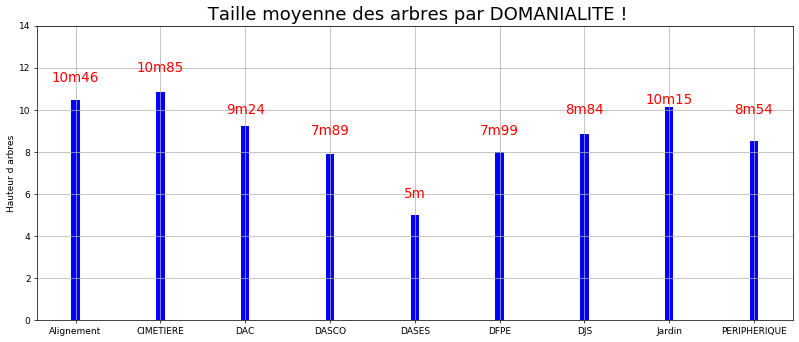

In [62]:
x = np.arange(9)
Hauteur = [10.46,10.85,9.24,7.89,5.00,7.99,8.84,10.15,8.54]
#fig, ax = plt.subplots()
width = 0.10 # taille des barres
plt.figure(figsize=(15,6), dpi=65) # taille de la figure
plt.ylim(0, 14) # intervalle d'axe des ordonnées

plt.bar(x, Hauteur, width, color='b') # caractéristiques d'affichage de la hauteur en bleu
plt.xticks(x, ('Alignement', 'CIMETIERE', 'DAC', 'DASCO','DASES','DFPE','DJS','Jardin','PERIPHERIQUE')) # valeurs affichée axe des abcisses
#plt.scatter([i+width/2.0 for i in x],Hauteur,color='b',s=50) # ajouter un cercle au sommet du bâton # affichage des valeurs hauteurs  sur l'axe des ordonnées

plt.text(1, 12, '10m85',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(0, 11.5, '10m46',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(2, 10, '9m24',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(3, 9, '7m89',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(4, 6, '5m',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(5, 9, '7m99',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(6, 10, '8m84',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(7, 10.5, '10m15',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')
plt.text(8, 10, '8m54',fontsize = 15,color='red', horizontalalignment = 'center', verticalalignment = 'center')



plt.grid() # format cadre du fond
plt.ylabel('Hauteur d arbres') # labelle axe des ordonnées
plt.title(' Taille moyenne des arbres par DOMANIALITE !',fontsize = 20) # labelle titre



plt.show()

In [63]:
# il faut faire les graph des max et min pour chaque Dominalité.ou introduire dans la graph précédent

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
#df1.plot(kind='bar',x ='DOMANIALITE',y = 'HAUTEUR_m',color ='red') # 
#plt.show()

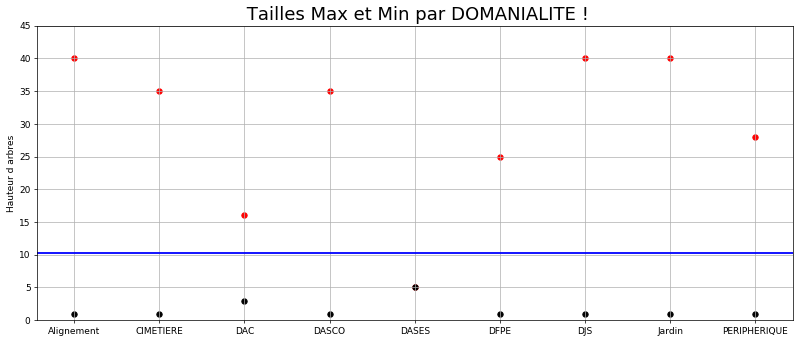

In [66]:
from pylab import *
x = np.arange(9)
Hauteur_Max = [40,35,16,35,5,25,40,40,28]
Hauteur_Min = [1,1,3,1,5,1,1,1,1]
m = Moyenne

plt.figure(figsize=(15,6), dpi=65) # taille de la figure
plt.ylim(0, 45) # intervalle d'axe des ordonnées

plt.axhline(y=m, xmin=0, xmax=10, linewidth=2, color = 'b') # affiche une ligne Horizontale y = Hauteur moyenne 
plt.scatter(x, Hauteur_Max, color='red') # scatter pour la hauteur Max en bleu
plt.xticks(x, ('Alignement', 'CIMETIERE', 'DAC', 'DASCO','DASES','DFPE','DJS','Jardin','PERIPHERIQUE')) # valeurs affichée axe des abcisses
plt.scatter(x, Hauteur_Min, color='k') #  scatter pour la hauteur Min

plt.grid() # format cadre du fond

plt.ylabel('Hauteur d arbres') # labelle axe des ordonnées
plt.title(' Tailles Max et Min par DOMANIALITE !',fontsize = 20) # labelle titre



plt.show()

In [67]:
# les arbres les plus haut >30
df7=df[(df["HAUTEUR_m"] > 30)]
df7 = df7.groupby(["DOMANIALITE"]).size().reset_index(name='NOMBRE')
display(df7.sort_values("NOMBRE"))

,DOMANIALITE,NOMBRE
3,DFPE,2
2,DASCO,17
1,CIMETIERE,22
5,Jardin,91
4,DJS,215
0,Alignement,222


In [68]:
# les arbres les plus haut >30
df8=df[(df["HAUTEUR_m"] < 2)]
df8 = df8.groupby(["DOMANIALITE"]).size().reset_index(name='NOMBRE')
display(df8.sort_values("NOMBRE"))

,DOMANIALITE,NOMBRE
3,DFPE,75
4,DJS,95
6,PERIPHERIQUE,107
2,DASCO,626
0,Alignement,1246
1,CIMETIERE,14592
5,Jardin,18027


In [69]:
print("Total arbres par éspèce sur le territoire parisien et les cimetières extra-muros ")
df3 = df[(df["HAUTEUR_m"] >= 1) & (df["HAUTEUR_m"] <= 40)]   # Ne recupere que les arbres entre 1 m et 40 m
df3 = df3.groupby(["LIBELLEFRANCAIS"]).size().reset_index(name='NOMBRE')

#print(tabulate(df1, headers="keys", tablefmt="orgtbl"))

display(df3.sort_values("NOMBRE"))


Total arbres par éspèce sur le territoire parisien et les cimetières extra-muros 


,LIBELLEFRANCAIS,NOMBRE
90,Kalopanax,1
28,Buddleja,1
52,Cordyline,1
67,Euscaphis,1
22,Aronie,1
74,Fremontia,1
80,Genêt,1
83,Heptacodion de Chine,1
84,Hiba,1
33,Caragana,1


In [70]:
# Traitements données par espèce et arrondissement

In [71]:
print("Total arbres par éspèce sur le territoire parisien et les cimetières extra-muros ")
df3 = df[(df["HAUTEUR_m"] >= 1) & (df["HAUTEUR_m"] <= 40) & (df["LIBELLEFRANCAIS"]=="Platane")]   # Ne recupere que les arbres entre 1 m et 40 m
print(df3.shape)


Total arbres par éspèce sur le territoire parisien et les cimetières extra-muros 
(40600, 6)


In [72]:
print("Les espèces d'arbres dans le 16 ème arrondissement")

Les espèces d'arbres dans le 16 ème arrondissement


In [73]:
df4=df[df.ARRONDISSEMENT=="PARIS 16E ARRDT"]

df4 = df4.groupby(["LIBELLEFRANCAIS"]).size().reset_index(name='NOMBRE')

#print(tabulate(df1, headers="keys", tablefmt="orgtbl"))

display(df4.sort_values("NOMBRE"))



,LIBELLEFRANCAIS,NOMBRE
30,"Cerisier à fleurs, cerisier griotte",1
115,Poliothyrsis,1
24,Camphrier,1
51,Eleagnus - Chalef,1
108,Pistachier,1
55,Euscaphis,1
63,Genévrier,1
101,Parrotie de Perse,1
98,Orme de Samarie,1
91,Nyssa,1


In [74]:
total_Arbres=df4.NOMBRE.sum()
print("Le nombre d'arbres dans le 16ème Arrondissement :\n",total_Arbres)

Le nombre d'arbres dans le 16ème Arrondissement :
 16797


In [75]:
df5=df[df.ARRONDISSEMENT=="PARIS 2E ARRDT"]

df5 = df5.groupby(["LIBELLEFRANCAIS"]).size().reset_index(name='NOMBRE')

#print(tabulate(df1, headers="keys", tablefmt="orgtbl"))

display(df5.sort_values("NOMBRE"))

,LIBELLEFRANCAIS,NOMBRE
0,Amélanchier,1
28,Pommier,1
15,Magnolia,1
20,Olivier,1
12,Fontanesia,1
31,Prunier à fleurs,1
9,Copalme,1
5,Cerisier à grappes,1
3,Cedrele,1
2,Arbre à soie,1


In [76]:
total_Arbres=df5.NOMBRE.sum()
print("Le nombre d'arbres dans le 2ème Arrondissement :\n",total_Arbres)

Le nombre d'arbres dans le 2ème Arrondissement :
 542
